In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [37]:
siswa = pd.read_csv('/content/data_siswa_smk.csv')
siswa.head()

,Unnamed: 0.1,Unnamed: 0,nama,tahun,status
0,0,0.0,Cayadi Wasita,2021.0,Kuliah
1,1,1.0,Tasnim Adriansyah,2019.0,Kuliah
2,2,2.0,H. Aditya Nugroho,2021.0,Menganggur
3,3,3.0,Jarwa Latupono,2020.0,Kuliah
4,4,4.0,Puspa Kuswandari,2019.0,Bekerja


In [38]:
siswa.duplicated().sum()

np.int64(0)

In [39]:
siswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  6500 non-null   int64  
 1   Unnamed: 0    5000 non-null   float64
 2   nama          6500 non-null   object 
 3   tahun         5000 non-null   float64
 4   status        5000 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 254.0+ KB


In [40]:
siswa.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,1500
nama,0
tahun,1500
status,1500


In [41]:
print(siswa.dtypes)

Unnamed: 0.1      int64
Unnamed: 0      float64
nama             object
tahun           float64
status           object
dtype: object


In [42]:
siswa.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)

In [43]:
siswa['tahun'] = pd.to_numeric(siswa['tahun'], errors='coerce')

In [44]:
siswa.head()

,nama,tahun,status
0,Cayadi Wasita,2021.0,Kuliah
1,Tasnim Adriansyah,2019.0,Kuliah
2,H. Aditya Nugroho,2021.0,Menganggur
3,Jarwa Latupono,2020.0,Kuliah
4,Puspa Kuswandari,2019.0,Bekerja


In [45]:
siswa.isna().sum()

,0
nama,0
tahun,1500
status,1500


In [46]:
siswa['tahun']= siswa['tahun'].fillna(siswa['tahun'].median())

In [47]:
siswa.fillna('unknown', inplace=True)

In [48]:
siswa.isna().sum()

,0
nama,0
tahun,0
status,0


In [49]:
siswa.duplicated().sum()
siswa.drop_duplicates(inplace=True)

In [50]:
siswa.duplicated().sum()

np.int64(0)

In [51]:
siswa.head()

,nama,tahun,status
0,Cayadi Wasita,2021.0,Kuliah
1,Tasnim Adriansyah,2019.0,Kuliah
2,H. Aditya Nugroho,2021.0,Menganggur
3,Jarwa Latupono,2020.0,Kuliah
4,Puspa Kuswandari,2019.0,Bekerja


In [52]:
siswa.groupby('tahun')['status'].value_counts()

tahun   status    
2019.0  Bekerja        587
        Kuliah         560
        Menganggur     544
2020.0  unknown       1499
        Menganggur     589
        Kuliah         524
        Bekerja        514
2021.0  Kuliah         602
        Menganggur     554
        Bekerja        523
Name: count, dtype: int64

In [53]:
siswa['status'].value_counts()

,count
status,
Menganggur,1687
Kuliah,1686
Bekerja,1624
unknown,1499


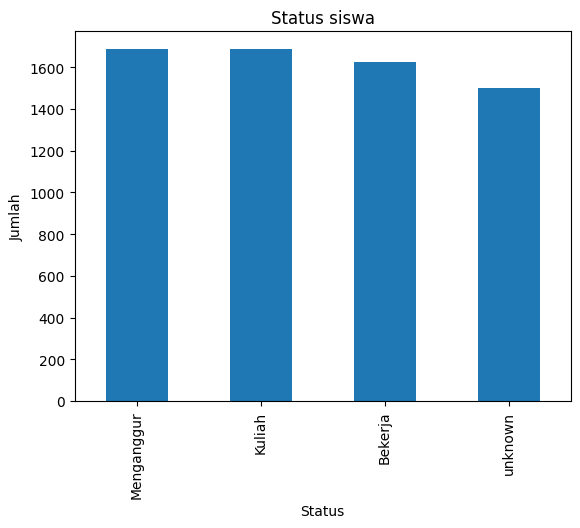

In [54]:
siswa['status'].value_counts().plot.bar()
plt.title('Status siswa')
plt.ylabel('Jumlah')
plt.xlabel('Status')
plt.tight_layout
plt.show()

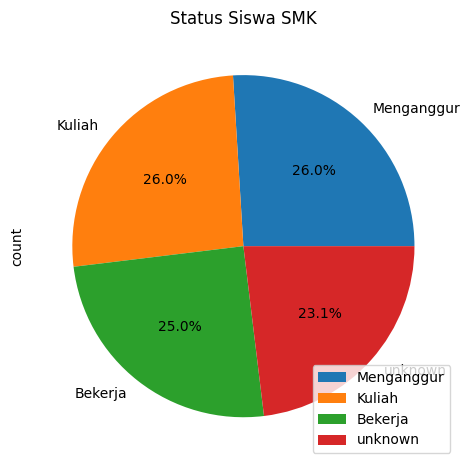

In [55]:
siswa['status'].value_counts().plot.pie(autopct='%1.1f%%', label=None, legend=True)
plt.title('Status Siswa SMK')
plt.tight_layout()
plt.show()

Distribusi Status per Tahun (Visualisasi)


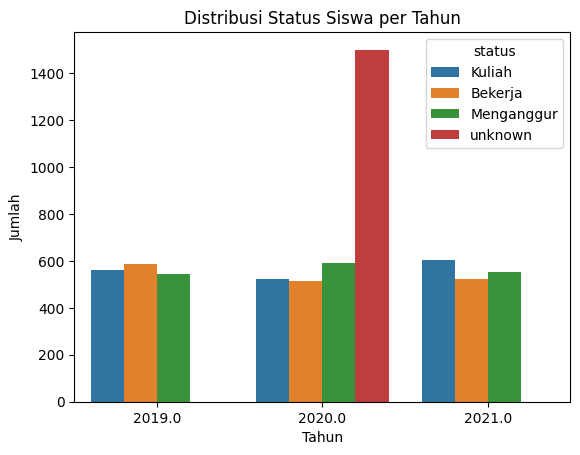

In [56]:
sns.countplot(data=siswa, x='tahun', hue='status')
plt.title('Distribusi Status Siswa per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

Tren Tahunan per Status

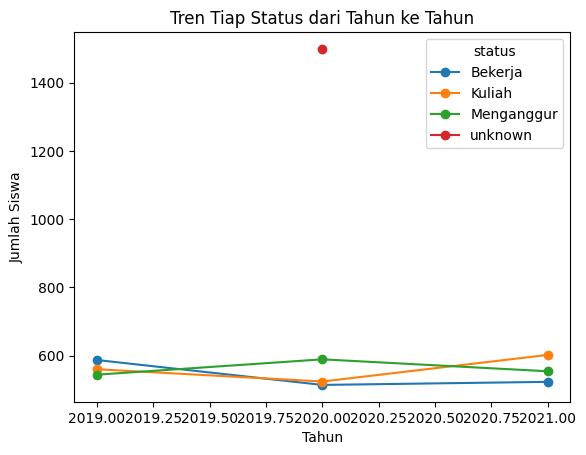

In [57]:
trend = siswa.groupby(['tahun', 'status']).size().unstack()
trend.plot(marker='o')
plt.title('Tren Tiap Status dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.show()

Heatmap Hubungan Tahun–Status

<Axes: xlabel='status', ylabel='tahun'>

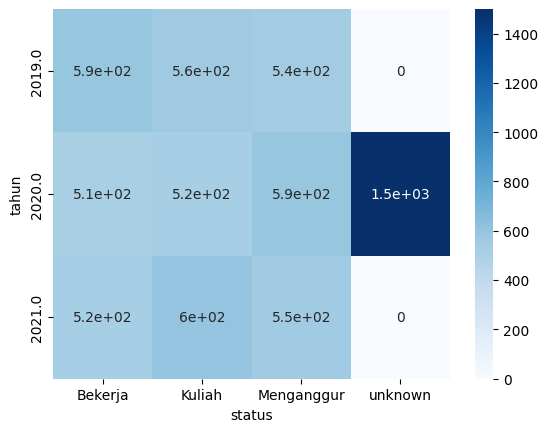

In [58]:
sns.heatmap(pd.crosstab(siswa['tahun'], siswa['status']), annot=True, cmap='Blues')


In [59]:


trend = siswa.groupby(['tahun', 'status']).size().reset_index(name='jumlah')
fig = px.line(trend, x='tahun', y='jumlah', color='status',
              title='Tren Tahunan per Status',
              template='plotly_dark')
fig.show()